# Problem Statement

Dream Housing Finance, a prominent home loan provider, operates across urban, semi-urban, and rural areas. The company aims to streamline its loan eligibility process, making it faster and more efficient by automating the evaluation based on customer details provided during the online application process.

The goal is to identify customer segments that qualify for loans, enabling the company to better target eligible applicants. This automation will enhance decision-making and improve customer satisfaction. To support this initiative, a partial dataset has been provided for analysis and model development.


# Dataset

The dataset we will be using in this project can be found in this link:
https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/code?datasetId=3523739&sortBy=commentCount


## Data Variables

| Column                     | Description                                                |
|----------------------------|------------------------------------------------------------|
| loan_id                    | Unique loan ID                                             |
| no_of_dependents           | Number of dependents of the applicant                      |
| education                  | Education level of the applicant                           |
| self_employed              | If the applicant is self-employed or not                  |
| income_annum               | Annual income of the applicant                             |
| loan_amount                | Loan amount requested by the applicant                     |
| loan_term                  | Tenure of the loan requested by the applicant (in years)   |
| cibil_score                | CIBIL score of the applicant                               |
| residential_assets_value   | Value of the residential asset of the applicant            |
| commercial_assets_value    | Value of the commercial asset of the applicant             |
| luxury_assets_value        | Value of the luxury asset of the applicant                 |
| bank_assets_value          | Value of the bank asset of the applicant                   |
| loan_status                | Status of the loan (Approved/Rejected)                     |


# Data Analysis

In [5]:
import pandas as pd
import numpy as np

In [6]:
#let´s load the data and have quick look at it
data = pd.read_csv('./loan_approval_dataset.csv')

print(data.sample(3))
print(data.columns)

      loan_id   no_of_dependents  education  self_employed   income_annum  \
1347     1348                  5   Graduate            Yes        7800000   
622       623                  4   Graduate            Yes        5300000   
2478     2479                  5   Graduate             No        7400000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
1347      22000000          20           528                    5800000   
622       19200000           4           655                   14200000   
2478      27100000           4           320                   19800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
1347                   8800000              24700000            4900000   
622                    6900000              17800000            3900000   
2478                  14600000              25200000            9400000   

      loan_status  
1347     Rejected  
622      Approved  
2478     Approved  
Index(['l

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
#as id colum is not providing any relevant information, I decided to get rid of it
data = data.drop('loan_id', axis=1)

#cleanning spaces in data colums names
data.columns = data.columns.str.strip()

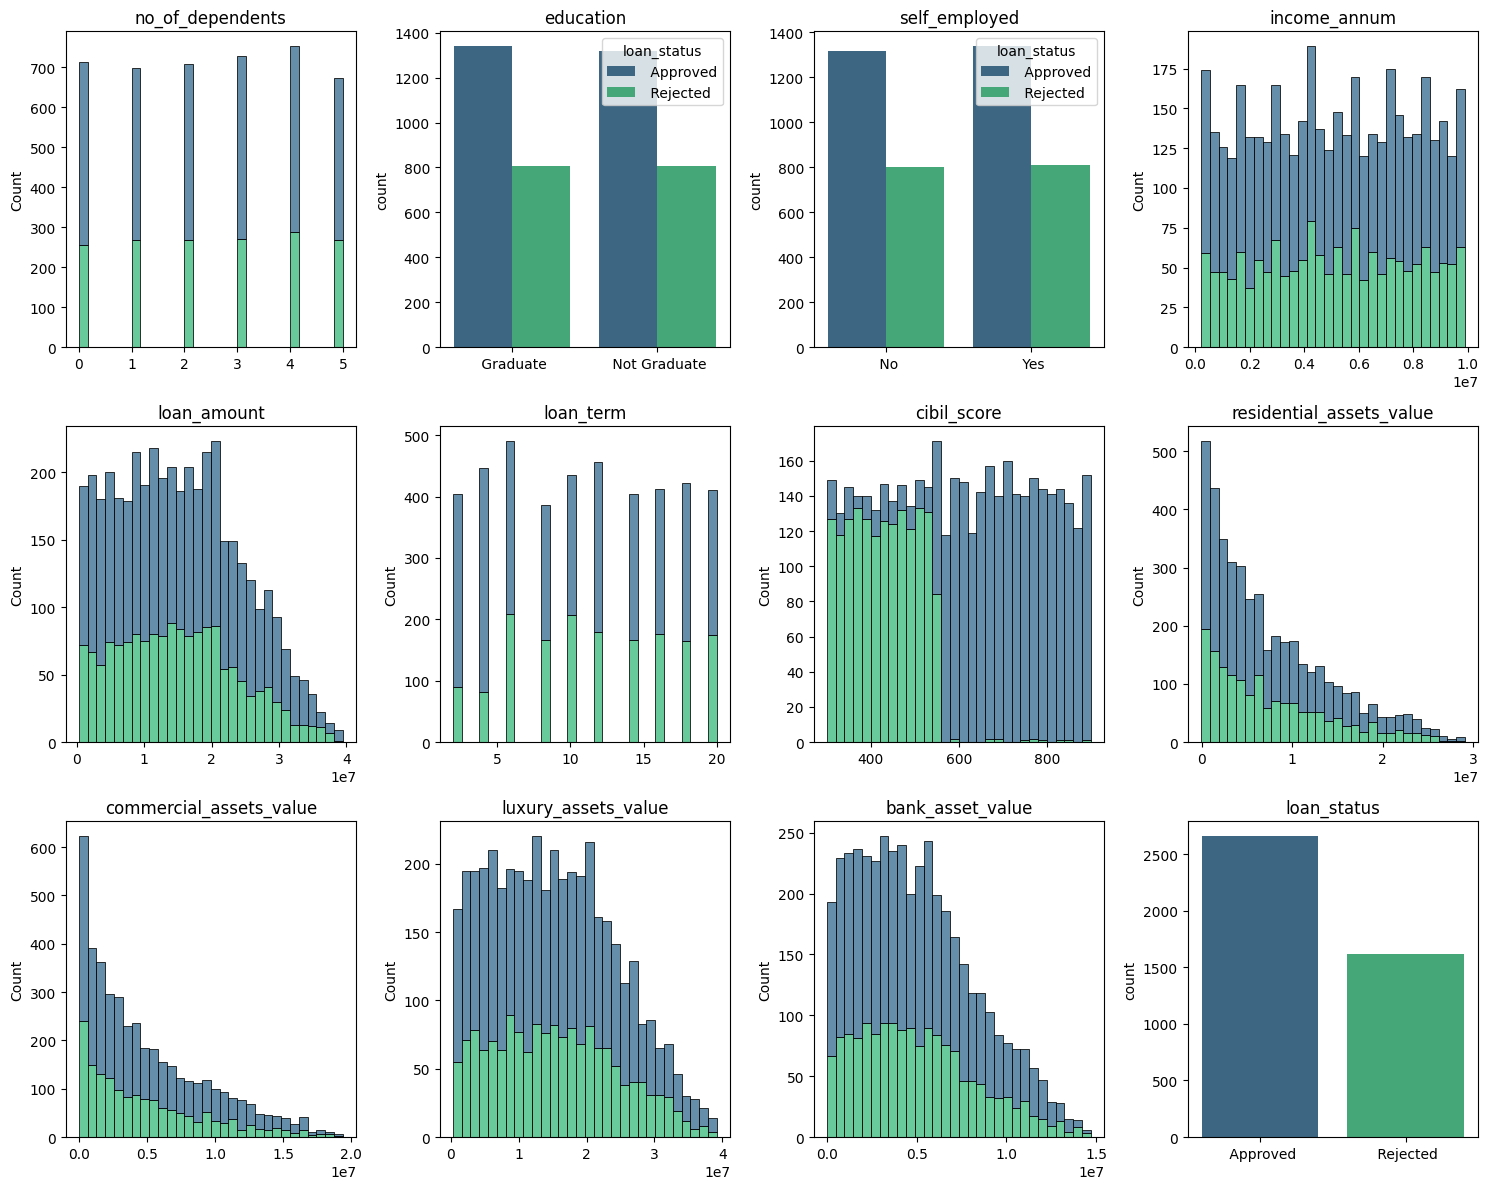

In [10]:
# Create subplots 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 3 * 4))

axes = axes.flatten()

# Plot each variable based on loan status
for ax, col in zip(axes, data.columns):
    if data[col].dtype == 'object':  
        sns.countplot(data=data, hue='loan_status', x=col, palette='viridis', ax=ax)
    else:  
        sns.histplot(data=data, x=col, bins=30, hue='loan_status', ax=ax, palette='viridis', legend=False, multiple='stack')
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

The analysis highlights potential patterns and relationships between the features with the approval or rejection of loans. 

<Axes: ylabel='cibil_score'>

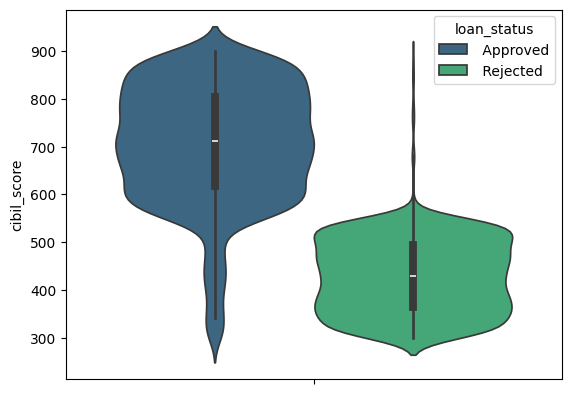

In [11]:
#let´s check credit score impact on loan_status as seems the most visible impact
sns.violinplot(hue='loan_status', y='cibil_score', data=data, palette='viridis')


This plot illustrates the distribution of CIBIL scores for approved and rejected loans. Approved loans show a higher concentration of scores above the 600 range, while rejected loans are predominantly distributed below 500. This highlights the strong influence of creditworthiness (CIBIL score) on loan approval decisions.

# Data Transformation and Feature Engineering 

In [12]:
#let´s convert categorical variables into numerical for modeling purposes
data['education'] = data['education'].map({' Not Graduate':0, ' Graduate':1})
data['self_employed'] = data['self_employed'].map({' No':0, ' Yes':1})
data['loan_status'] = data['loan_status'].map({' Rejected':0, ' Approved':1})

In [13]:
# let´s include the monthly loan payment variable as part of our analysis
import numpy_financial as npf

data['monthly_loan'] = npf.pmt(
    ((4.2 - (2 * (data['cibil_score'] - 100) / 800)) / 100) / 12,  #let´s calculate interest from loan based on cibil score (to make it simple)
    data['loan_term'] * 12,  
    -data['loan_amount']  
)

data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_loan
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,240623.216757
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,145370.025791
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,167479.560694
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,364050.589276
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,140288.082783


In [14]:
#now that we have this new variable, let´s explore some variables I believe are interesting for our analisys
#variable wich considers income loan and credit score 
data['income_to_loan_score'] = ((data['income_annum'] * data['loan_term']) / data['loan_amount']) * data['cibil_score']

#variable wich measure part of the income the loan is taking
data['payment_to_income'] = data['monthly_loan'] / (data['income_annum'] / 12)

data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_loan,income_to_loan_score,payment_to_income
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,240623.216757,2997.511706,0.300779
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,145370.025791,1121.114754,0.425473
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,167479.560694,3100.740741,0.220852
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,364050.589276,997.889251,0.532757
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,140288.082783,3093.884298,0.171781


In [15]:
data.corr()['loan_status']

no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
monthly_loan                0.112477
income_to_loan_score        0.262503
payment_to_income           0.170535
Name: loan_status, dtype: float64

In [16]:
# lets divide the data into trainning and test 80/20
from sklearn.model_selection import train_test_split

X = data.drop(columns=['loan_status'])  
y = data['loan_status']  
              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Size of training data: {X_train.shape}")
print(f"Size of testing data: {X_test.shape}")

Size of training data: (3415, 14)
Size of testing data: (854, 14)


# Model Training and Evaluation

In [17]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier

## Logistic Regression

In [18]:
lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression accuracy:", accuracy)

Logistic Regression accuracy: 0.7049180327868853


## Random Forest Classifier

Random Forest accuracy: 0.9941451990632318


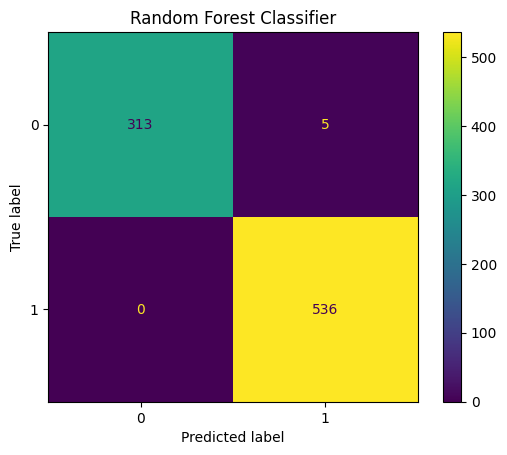

In [19]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the testing data
rf_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest accuracy: {accuracy:}")

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred), display_labels=rf.classes_).plot(cmap="viridis")
plt.title('Random Forest Classifier')
plt.show()


The Random Forest Classifier achieved **99.4% accuracy**. The confusion matrix shows minimal errors, with only 5 false positives and 0 false negatives.

## XGBoost Classifier

XGBoost accuracy: 0.9941451990632318


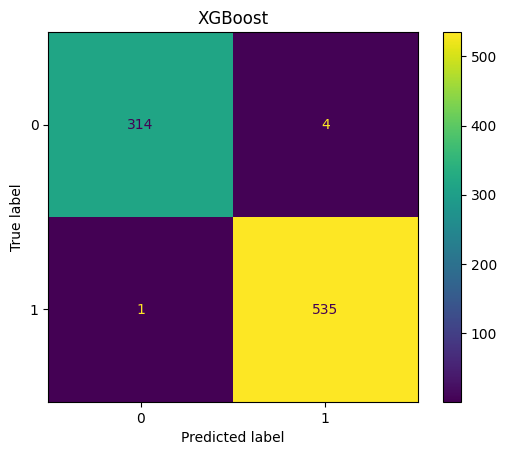

In [20]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
xgb_pred = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost accuracy: {accuracy:}")

cm = confusion_matrix(y_test, xgb_pred)
ConfusionMatrixDisplay(cm, display_labels=xgb_model.classes_).plot(cmap='viridis')
plt.title('XGBoost')
plt.show()

The XGBoost Classifier achieved **99.4% accuracy**, with only 4 false positives and 1 false negative.

## Implementing Voting Classifier

To leverage the strengths of the models, we will implement a Voting Classifier that combines predictions from Random Forest and XGBoost for improved accuracy and robustness.


Voting Classifier accuracy: 0.9953161592505855


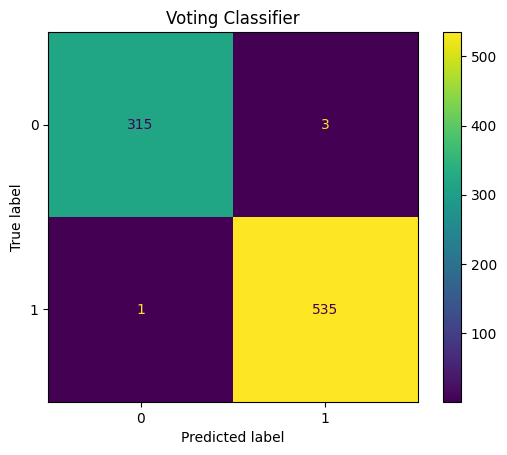

In [21]:
vc = VotingClassifier(estimators=[('rf', rf),('xgb', xgb_model)],voting='soft')
vc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)
cm = confusion_matrix(y_test, vc_pred)

accuracy = accuracy_score(y_test, vc_pred)
print(f"Voting Classifier accuracy: {accuracy:}")

ConfusionMatrixDisplay(cm, display_labels=vc.classes_).plot(cmap='viridis')
plt.title('Voting Classifier')
plt.show()

# Final Conclusions

The Voting Classifier, which combines the strengths of Random Forest and XGBoost achieved an impressive accuracy of **99.53%**. The confusion matrix indicates minimal misclassifications, with only **4 errors out of 854 predictions**.

This results validate the model's readiness for practical application, with minimal misclassification and exceptional accuracy. 